Wapp to implement following logistic machine learning algorithm
1. K Mean
2. Decision tree
3. Hirarchical Clustering

K Means Clustering

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
   median_income  latitude  longitude
0         8.3252     37.88    -122.23
1         8.3014     37.86    -122.22
2         7.2574     37.85    -122.24
3         5.6431     37.85    -122.25
4         3.8462     37.85    -122.25


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   median_income  latitude  longitude  Cluster
0         8.3252     37.88    -122.23        0
1         8.3014     37.86    -122.22        0
2         7.2574     37.85    -122.24        0
3         5.6431     37.85    -122.25        0
4         3.8462     37.85    -122.25        1


<ipython-input-6-27554f66e995>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


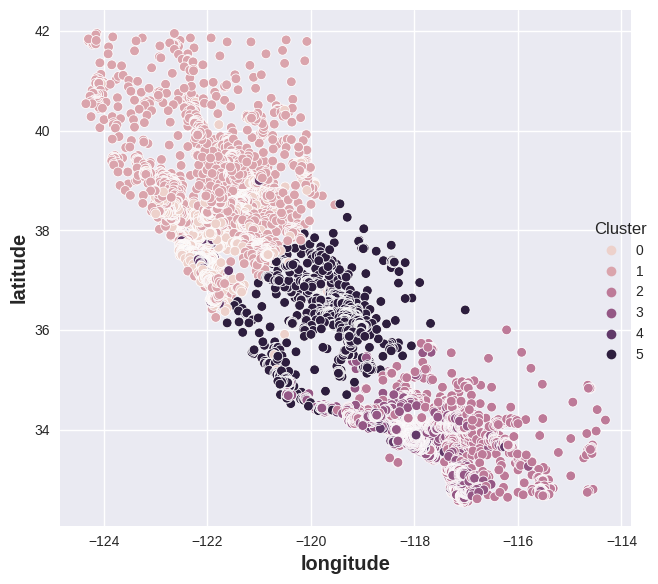

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
sns.set()
data=pd.read_csv('housing.csv')
print(data.columns)
data=data.loc[:,['median_income','latitude','longitude']]
print(data.head())

kmeans=KMeans(n_clusters=6)
data["Cluster"]=kmeans.fit_predict(data)
data["Cluster"]=data["Cluster"].astype("int")
print(data.head())

plt.style.use("seaborn")
plt.rc("figure",autolayout=True)
plt.rc("axes",labelweight="bold",labelsize="large",titleweight="bold",titlesize=14,titlepad=10)
sns.relplot(data=data,x="longitude",y="latitude",hue="Cluster",height=6)
plt.show()

Decision Tree Clustering

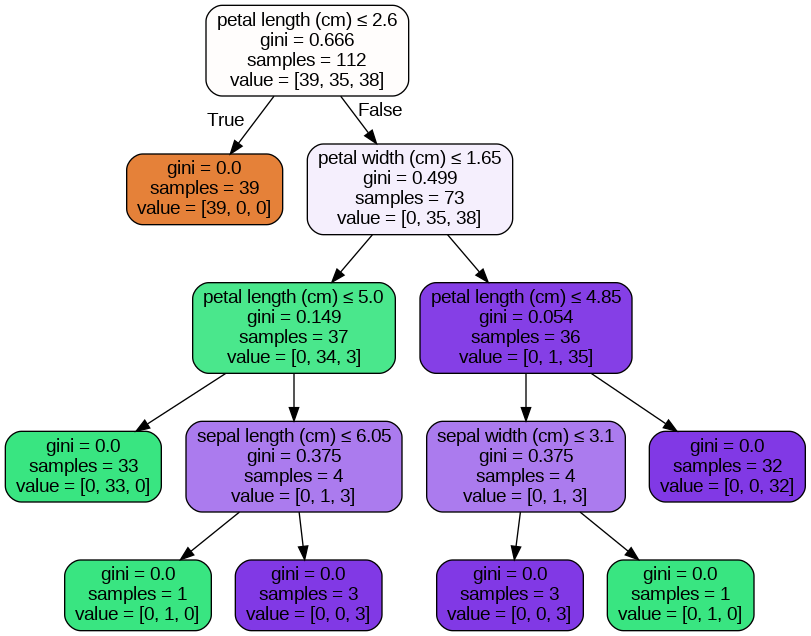

Accuracy: 94.73684210526315


In [6]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
import pydot
from IPython.display import Image

dataset = load_iris()
X = dataset.data
Y = dataset.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=50, test_size=0.25)
model = DecisionTreeClassifier().fit(x_train, y_train)
dot_data = StringIO()

tree.export_graphviz(model, out_file=dot_data, feature_names=dataset.feature_names, filled=True, rounded=True, special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]

png_data = graph.create_png()
display(Image(png_data))

Y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test) * 100
print("Accuracy:", accuracy)


Hirarchical Clustering

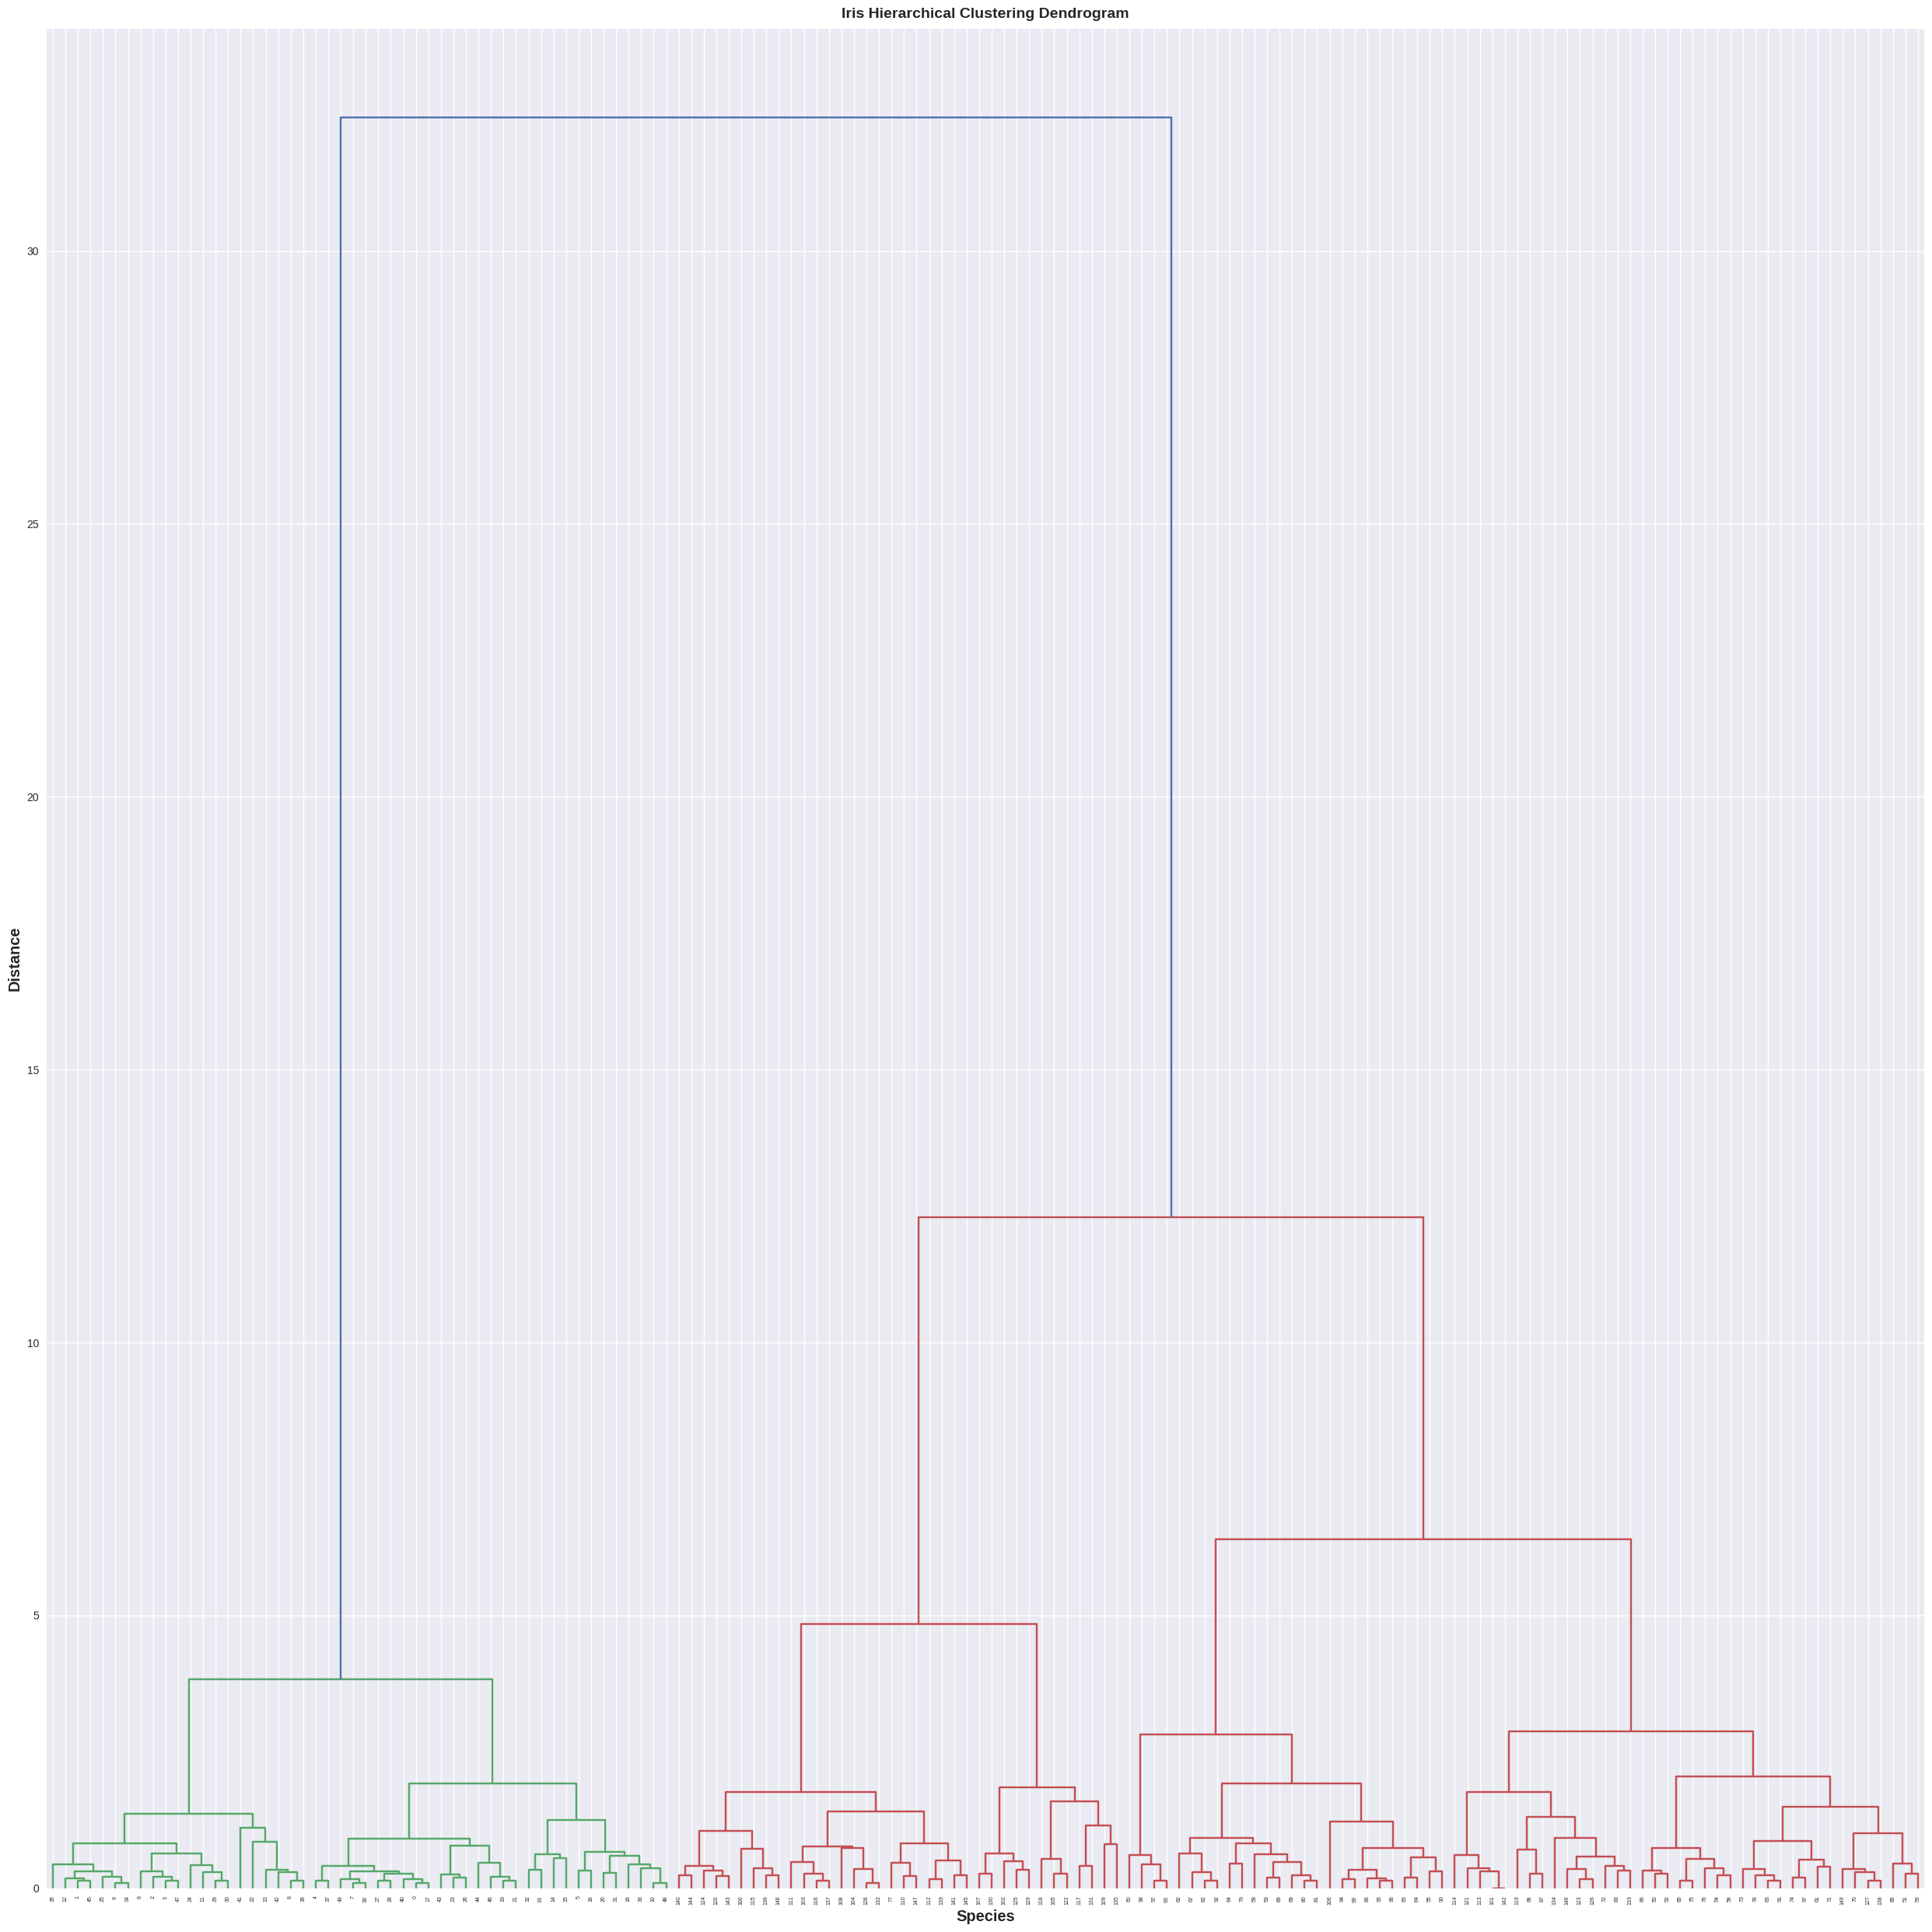

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram,linkage
dataset=load_iris()
Y=dataset.target
X=pd.DataFrame(dataset.data)
X.columns=['sepal_length','sepal_width','petal_length','petal_width']
link=linkage(X,'ward')
plt.figure(figsize=(25,25))
plt.title("Iris Hierarchical Clustering Dendrogram")
plt.xlabel("Species")
plt.ylabel("Distance")
dendrogram(link)
plt.show()